In [1]:
# The following script consists of a Python version of Andrew Ng Stanford Course 'Machine Learning' taught on the Coursera Platform
# Note: All exercise data and structure are credited to Stanford University 

# Caveat: Contrary to the modularity presented in Octave scripts and as I'm using Jupyter Notebooks for educational purposes we will implement the functions on the same notebook where we will call them

# Exercise 1 - Plotting the Data

In [2]:
#Import numpy libraries to deal with matrixes and vectors
import numpy as np
#Import pandas do read data files
import pandas as pd
#Import matplotlib to plot data
import matplotlib.pyplot as plt

#Import math 
import math 

#Import scipy optimization function
from scipy import optimize

#Matplotlib notebook property
%matplotlib inline

In [3]:
#Read Text File and create X and y variables - Keeping them as Pandas iSeries would be almost the same but it is more "pure" in terms of comparison with Octave to have array objects
ex2_file = pd.read_csv('ex2data2.txt', header=None) 
X = np.array(ex2_file.iloc[:,0:2])
y = np.array(ex2_file.iloc[:,2])


print('# of training examples: {}'.format(len(X)))
m = len(X)

# of training examples: 118


In [4]:
def plotData(X: np.array,y: np.array):
    plt.scatter(X[y==0,0], X[y == 0,1], marker='o', edgecolors='black', color='yellow')
    plt.scatter(X[y==1,0], X[y == 1,1], marker='+', facecolors='none', c='black')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend(('Rejected','Accepted'), loc='best', bbox_to_anchor=(1, 0.5))

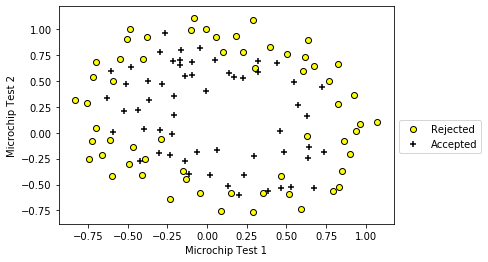

In [5]:
#Plot our data showing + marker for Accepted examples and 'o' marker for Rejected ones
plotData(X,y)

The following exercise has two objectives: 
    - Teaching about regularization and how it can be used as a tool to avoid overfitting;
    - Use polynomial features to enhance linear models;
    
<br>
<br>
The equations for the cost function and gradient with regularization are as follows:

<img src="assets/CostFunctionRegularization.JPG">

<img src="assets/GradientRegularization.JPG">

Notice how the lambda parameter controls the regularization both for the cost function and the gradient.
<br>
A higher Lambda (λ) parameter means a higher penalty on coefficients and thus a less capability of our features to impact our models' outcome.

# Exercise 2 -  Regularization

In [6]:
#Note that there is impossible to use a line to separate these points. 
#We can't really find a way to cut the classes like the previous exercise 

#We want a kind of circle that isolate our plot in our linear features - so we will try to do a polynomial space to isolate this!
#We will keep the polynomial degree = 6

#Notice that in this case (contrary to other exercises) I am using the function mapFeature to add the array of ones 

def mapFeature(X1: np.array, X2: np.array)-> np.array: 
    #Add column of ones to the array 
    out = np.ones((X1.shape[0],1))
    degree = 6
    for i in range(1,degree+1):
        for j in range(0,i+1):
            new_poly_feature = (X1**(i-j))*(X2**j)
            out = np.hstack((out, new_poly_feature.reshape(len(out),1)))
    return out

In [7]:
#Map polynomial features

X_Poly = mapFeature(X[:,0], X[:,1])

In [8]:
#Initialize the Theta parameters 

initial_theta = np.zeros(X_Poly.shape[1])

In [9]:
#Set lambda to 1 - renaming it lambdas python has the keyword lambdas
lambdas = 1 

In [10]:
#Define sigmoid function 
def sigmoid(x: np.array)-> np.array:
      return(1 / (1 + np.exp(-x)))

In [11]:
def costFunctionReg(theta: np.array, X: np.array, y: np.array, lambdas: int) -> [int, np.array]:
    m = len(X)
    
    #Penalize cases where the algorithm misclassified true positives
    cost_function_1 = np.dot(-y.T,np.log(sigmoid(np.dot(theta.T,X.T))))
    #Penalize cases where the algorithm misclassified true negatives
    cost_function_2 = np.dot((1-y).T,np.log(1-sigmoid(np.dot(theta.T,X.T))))
    
    #Calculate cost function without regularization
    J = (1/m) * (cost_function_1 - cost_function_2)
    #Apply regulatization to cost function
    J = J+((lambdas/(2*m))*sum(theta[1:]**2))
    
    reg = (lambdas/m)*theta
    
    #Theta0 is not regularized
    reg[0] = 0 
    
    #Initialize
    grad = (sigmoid(np.dot(theta.T, X.T)) - y.T)
    
    grad = (np.dot(grad,X)/m).T + reg
    
    return J, grad

In [12]:
cost, grad = costFunctionReg(initial_theta, X_Poly, y, lambdas)

In [13]:
print('Cost at initial theta is {}'.format(np.round(cost,3)))
print('Gradient at initial theta is {}'.format(np.round(grad,3)))

Cost at initial theta is 0.693
Gradient at initial theta is [0.008 0.019 0.    0.05  0.012 0.038 0.018 0.007 0.008 0.023 0.039 0.002
 0.013 0.003 0.039 0.02  0.004 0.003 0.006 0.004 0.031 0.031 0.001 0.006
 0.    0.007 0.001 0.039]


In [14]:
#Check cost function and gradient with vector of thetas = 1 and lambda = 10

test_theta = np.ones(X_Poly.shape[1])
lambdas = 10

In [15]:
cost, grad = costFunctionReg(test_theta, X_Poly, y, lambdas)

In [16]:
print('Cost at initial theta is {}'.format(np.round(cost,3)))
print('Gradient at initial theta is {}'.format(np.round(grad,3)))

Cost at initial theta is 3.165
Gradient at initial theta is [0.346 0.161 0.195 0.227 0.092 0.244 0.143 0.108 0.102 0.183 0.174 0.087
 0.118 0.086 0.2   0.135 0.095 0.094 0.1   0.091 0.175 0.15  0.087 0.099
 0.085 0.102 0.085 0.182]


# Exercise 3 -  Regularization and Accuracies

We will now optimize our cost function in terms of our Θ parameters.

In [17]:
#Initialize the Theta parameters with 0's

initial_theta = np.zeros(X_Poly.shape[1])

In [27]:
#Set lambda to 2 
lambdas = 1

In [28]:
# set options for optimize.minimize
options= {'maxiter': 400}

# implementation based on Gerges Dib (github user:dibgerge) - optimizing our costFunction using scipy optimize library. 
# We minimize the cost function starting on the initial theta 
# TNC means Truncated Newton Algorithm and maxiter is set to 400 to match the implementation of Andrew octave script

res = optimize.minimize(costFunctionReg,
                        initial_theta,
                        (X_Poly, y, lambdas),
                        jac=True,
                        method='TNC',
                        options=options)

In [29]:
cost = res.fun
opt_theta = res.x
print('Optimal cost found by optimize method: {}'.format(float(res.fun)))
print('Optimal theta vector found by optimize method: {}'.format(opt_theta))

Optimal cost found by optimize method: 0.529002729964516
Optimal theta vector found by optimize method: [ 1.27271026  0.62529964  1.18111686 -2.01987398 -0.9174319  -1.43166928
  0.12393227 -0.36553118 -0.35725403 -0.17516292 -1.4581701  -0.05098418
 -0.61558553 -0.27469165 -1.19271298 -0.2421784  -0.20603298 -0.04466178
 -0.27778951 -0.29539514 -0.45645982 -1.04319154  0.02779373 -0.29244871
  0.0155576  -0.32742405 -0.1438915  -0.92467487]


In [30]:
def plotDecisionBoundary(optimal_theta: np.array, 
                        X: np.array,
                        y: np.array):
    plotData(X,y)
    #Plot contour to get the decision boundary 
    #Use a linear space to plot the contour over each hypothesis calculated 
    
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros([len(u), len(v)])    
    
    for i in np.arange(0,u.shape[0]):
        for j in np.arange(0,v.shape[0]):
            temp = np.array(u[i])
            z[i,j] = np.dot(mapFeature(np.array(u[i]).reshape(1), np.array(v[j]).reshape(1)), optimal_theta)
    
    plt.contour(u,v,z.T,0)
    #plt.legend(('Decision Boundary','Not admitted','Admitted'), loc='best', bbox_to_anchor=(1, 0.5))

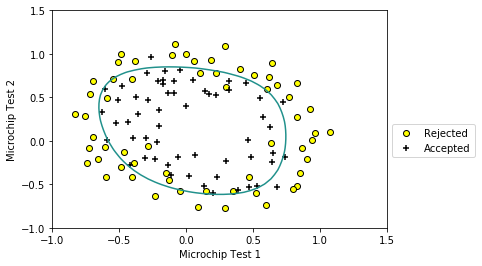

In [31]:
plotDecisionBoundary(opt_theta, X,y)

In [35]:
#Computing the Accuracy for out training Set
#I've added the thres parameter for us to see the effect of moving the threshold of considering a case a positive example
def predict(theta: np.array, 
            X: np.array, thres: float)-> np.array:
    #Add column of ones to the array 
    m = len(X)
    p = sigmoid(np.dot(X, theta.T))
    p = np.where(p>= thres,1,0)
    return p

In [40]:
p = predict(opt_theta, X_Poly, 0.5)

In [41]:
#Check the accuracy of our model 
print('We have got {:.0%} of the examples of the training set using a decision boundary of 50%'.format(sum(p == y)/len(X_Poly)))

We have got 83% of the examples of the training set using a decision boundary of 50%
